<center>

# __4. External provider simulators__

November 21, 2023

<br>

__Herramientas de la Computación Cuántica__

__Máster en Ciencia y Tecnologías de Información Cuántica (MQIST)__

<br>

Diego Alvarez-Estevez, PhD.

_Centro de Investigación en Tecnologías de la Información y las Comunicaciones (CITIC)_

_Universidade da Coruña_

</center>

## 4.1. The IBM Quantum provider

It can be used to access both remote simulators and real hardware hosted at IBM Quantum platform

In recent versions it is available through the independent optional package ```qiskit-ibm-provider```:

**pip install qiskit-ibm-provider**

Note it substitutes the now deprecated ```qiskit-ibmq-provider```

More information:

<a href=https://qiskit.org/ecosystem/ibm-provider/index.html>Qiskit IBM Provider Documentation</a>

<a href=https://github.com/Qiskit/qiskit-ibm-provider>GitHub project</a>



In [1]:
# Version checking
import qiskit_ibm_provider
import qiskit.tools.jupyter

import sys
print(sys.executable)

%qiskit_version_table

/home/jvazquez/miniconda3/envs/basic-quantum/bin/python


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

# Build circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

# 1. Get the API token in https://quantum-computing.ibm.com/account
provider = IBMProvider(token="368ce8e3d58876f8744c71270f2727fd9883b04d75ad646fa5f7345d0b9dede6f06cdc12ebf7e0d0db8a2f0881369da230f432512437401e11ae29dd202b9561") # 1
#provider = IBMProvider() # if previously saved
backend = provider.get_backend("simulator_statevector")

# Transpile and run the circuit
transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit)

counts = job.result().get_counts()
print(counts)

{'00': 1962, '11': 2038}


In above example I am invoking the constructor method ```IBMProvider(TOKEN)``` providing a <u>personal</u> token linked to my IBM Quantum account.

Alternatively I could use ```IBMProvider()```, in which case it will try to find credentials previously saved on the local machine. An error will be raisen if local credentials cannot be found.

For this purpose the following class methods are available: 

- ```IBMProvider.save_account(TOKEN, INSTANCE)```: Save your account to disk for future use and optionally set a default instance (hub/group/project) to be used when loading your account. 

- ```IBMProvider.saved_accounts()```: View the accounts saved to disk. 

- ```IBMProvider.delete_account()```: Delete the saved account from disk. 

- ```IBMProvider.active_account()```: List the account currently active in the session.

Check the API for more information on methods available for the <a href=https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.IBMProvider.html#qiskit_ibm_provider.IBMProvider>IBMProvider class</a>

In [7]:
# Examine the following code
from qiskit_ibm_provider import IBMProvider

token = "368ce8e3d58876f8744c71270f2727fd9883b04d75ad646fa5f7345d0b9dede6f06cdc12ebf7e0d0db8a2f0881369da230f432512437401e11ae29dd202b9561"
provider = IBMProvider(token=token)

# Check if local credentials available
#saved_accounts = IBMProvider.saved_accounts() # would also do the job
saved_accounts = provider.saved_accounts()
if bool(saved_accounts) == False: # empty dictionaries evaluate to False in Python
    print("No local creditials saved, use IBMProvider(token) interface or save them first")
    IBMProvider.save_account(token=token)
else:
    print("Saved accounts:")
    print(saved_accounts)
    #act_acc = IBMProvider.active_account() # I cannot call it like this because it is non-static method (saved_acconts() instead is)
    act_acc = provider.active_account()
    if bool(act_acc) == False:
        print("No active account currently in use in this session")
    else:
        print("Active account:")
        print(act_acc)

Saved accounts:
{'default-ibm-quantum': {'channel': 'ibm_quantum', 'token': '368ce8e3d58876f8744c71270f2727fd9883b04d75ad646fa5f7345d0b9dede6f06cdc12ebf7e0d0db8a2f0881369da230f432512437401e11ae29dd202b9561', 'url': 'https://auth.quantum-computing.ibm.com/api', 'verify': True}}
Active account:
{'channel': 'ibm_quantum', 'token': '368ce8e3d58876f8744c71270f2727fd9883b04d75ad646fa5f7345d0b9dede6f06cdc12ebf7e0d0db8a2f0881369da230f432512437401e11ae29dd202b9561', 'url': 'https://auth.quantum-computing.ibm.com/api', 'verify': True, 'instance': 'ibm-q/open/main'}


<span style="color:red">PRACTICE:</span> Make an account at IBM Quantum (if not done already) and try to execute the following code using your personal token

In [8]:
# Solution to practice
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

# Build circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

# Using saved local credentials
provider = IBMProvider() # 1

backend = provider.get_backend("simulator_statevector") # 2
print(type(backend))

# Transpile and run the circuit
transpiled_circuit = transpile(circuit, backend) # 3
job = backend.run(transpiled_circuit)
print(type(job))

counts = job.result().get_counts()
print(counts)

<class 'qiskit_ibm_provider.ibm_backend.IBMBackend'>
<class 'qiskit_ibm_provider.job.ibm_circuit_job.IBMCircuitJob'>
{'11': 1993, '00': 2007}


Some remarks:

1. In this format, the default ```instance``` will be used. An instance is a ```hub/group/project``` tuple which determines the specific access to devices and simulators available on IBM Quantum. At present the default instance (available for any account) is  ```ibm-q / open / main```. Premium users, or those associated to specific companies, research groups, or projects may be granted additional services through other instances. The list of instances available to your account can be found under account details in the instances section:

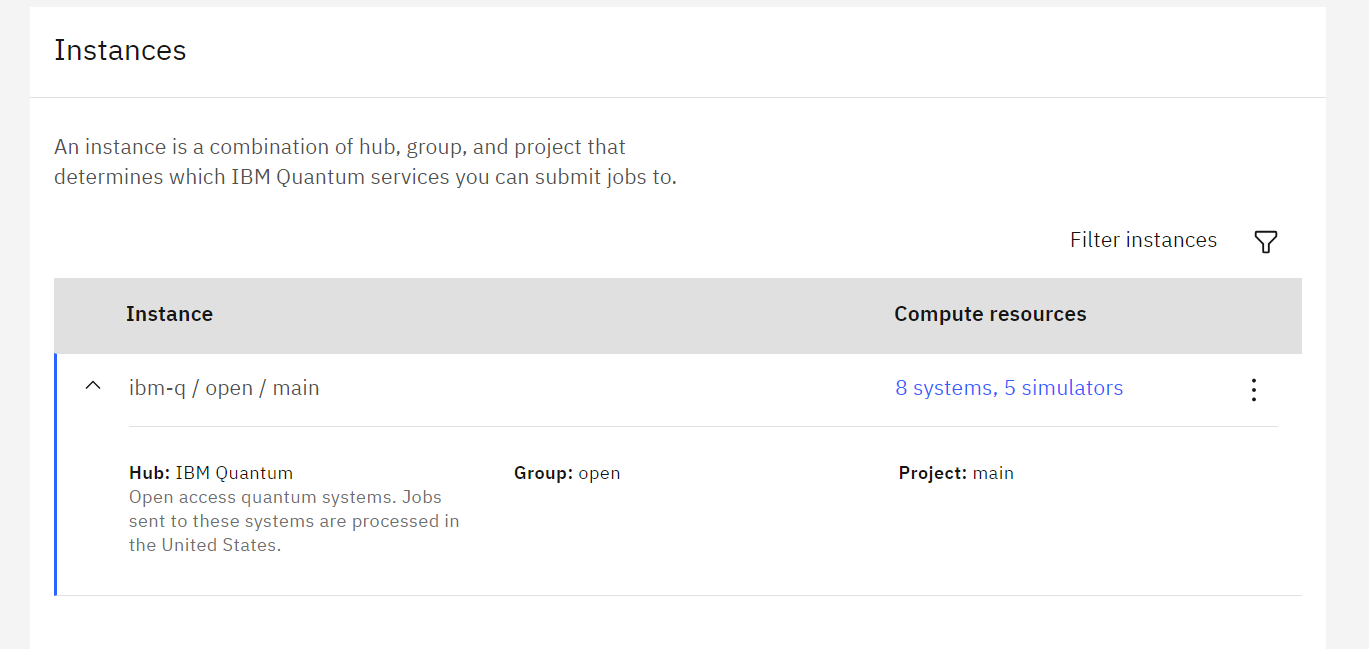

2. Notice the interface for selecting a backend is similar to (Basic)Aer. They both actually implement the ```qiskit.providers.ProviderV1``` interface. The returned backend is of type ```IBMBackend``` which is similar (but not exactly the same!) as ```BackendV1``` returned, for example, by BasicAer. Check <a href=https://qiskit.org/ecosystem/ibm-provider/tutorials/1_the_ibm_quantum_account.html#Backends>API documentation</a> for more details. <span style="color:red">Check: </span>Which backend type ```IBMBackend``` actually inherits from?

3. We may notice that the transpilation / running process now takes a bit more time than when using local simulators

Now, for example, let us list all available backends in the default instance:

In [9]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance="ibm-q/open/main") # Using specific instance

backend_list = provider.backends()

for backend in backend_list:
    print(type(backend).__name__ + "('" + str(backend) + "')")

IBMBackend('<IBMBackend('ibm_brisbane')>')
IBMBackend('<IBMBackend('ibm_kyoto')>')
IBMBackend('<IBMBackend('ibm_osaka')>')
IBMBackend('<IBMBackend('ibmq_qasm_simulator')>')
IBMBackend('<IBMBackend('simulator_extended_stabilizer')>')
IBMBackend('<IBMBackend('simulator_mps')>')
IBMBackend('<IBMBackend('simulator_statevector')>')
IBMBackend('<IBMBackend('simulator_stabilizer')>')


You may also optionally filter the set of returned backends, by passing arguments that query the backend’s ```configuration```, ```status```, or ```properties```. We can access these, respectively, using the ```configuration()```, ```status()```, and ```properties()``` methods of the backend. The filters are passed by conditions. You can also make more advanced filtering, for example, by using _lambda_ functions.

Notice that Qiskit splits information about a backend into three categories:

-**Configuration**: information about the system that does not change with time (e.g. number of qubits or the coupling map)

-**Properties**: information that may change with time and requires remeasuring and calibration (e.g. gate errors and decoherence times of the qubits)

-**Options**: default settings used when running jobs on the backend. We can override these when using the ```.run()``` method (e.g. ```.run(qc, shots = 1024)```) or change these for an instance of a backend via ```set_options()``` method. We can access them through the ```.options``` attribute

As an example let's return only those backends that are real quantum devices, which are currently operational, and that have at least 5 qubits:

In [10]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance="ibm-q/open/main") # Using specific instance

backend_list = provider.backends(min_num_qubits=5, simulator=False, operational=True)

for backend in backend_list:
    print(type(backend).__name__ + "('" + str(backend) + "')")

IBMBackend('<IBMBackend('ibm_kyoto')>')
IBMBackend('<IBMBackend('ibm_osaka')>')
IBMBackend('<IBMBackend('ibm_brisbane')>')


In the following code section, we inspect the configuration, properties, options, and status of the first backend:

In [ ]:
conf = backend_list[0].configuration()
props = backend_list[0].properties()
options = backend_list[0].options
status = backend_list[0].status()

# Examining the types (useful to check corresponding API docs)
print(type(conf))
print(type(props))
print(type(options))
print(type(status))

# Examine the actual elements:
print("\nConfiguration:\n", conf.to_dict())

print("\nProperties\n", props.to_dict())

print("\nOptions:\n", options)

print("\nStatus:\n", status.to_dict())

<span style="color:red">EXERCISE:</span> Create a function that receives a ```ProviderV1```-type provider object and lists all the corresponding simulator backend objects within, showing for each of them, their corresponding number of qubits, max. supported shots, and the number of basis gates that they implement.

As an example, the output for an instance of the BasicAer provider should look similar to the following:

```python

from qiskit import BasicAer
list_device_properties(BasicAer)

Name                                     #Qubits    Max shots. #BasisGates Description
----                                     -------    ---------- ----------- ------------
qasm_simulator                           24         0          9          Local simulator. A python simulator for qasm experiments
statevector_simulator                    24         0          9          Local simulator. A Python statevector simulator for qobj files
unitary_simulator                        14         0          9          Local simulator. A python simulator for unitary matrix corresponding to a circuit
```

The function should work similarly for Aer and IBMProvider

In [19]:
from qiskit import BasicAer
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider

def list_provider_simulators(provider):
    backends = provider.backends()

    print(f"{'Name':<40}{'#Qubits':<10}{'Max shots.':<12}{'#BasisGates':<12}Description")
    print("-" * 80)

    for backend in backends:
        name = backend.configuration().backend_name
        num_qubits = backend.configuration().n_qubits
        max_shots = backend.configuration().max_shots
        basis_gates = len(backend.configuration().basis_gates)
        if hasattr(backend.configuration(), 'description'):
            description = backend.configuration().description
        else:
            description = "None"

        print(f"{name:<40}{num_qubits:<10}{max_shots:<12}{basis_gates:<12}{description}")
    
# Now we can list and compare backends of different providers
print("\nBasicAer backends:")
list_provider_simulators(BasicAer)

print("\nAer backends:")
list_provider_simulators(Aer)

print("\nIBMProvider backends:")
list_provider_simulators(IBMProvider())


BasicAer backends:
Name                                    #Qubits   Max shots.  #BasisGates Description
--------------------------------------------------------------------------------
qasm_simulator                          24        0           12          A python simulator for qasm experiments
statevector_simulator                   24        0           9           A Python statevector simulator for qobj files
unitary_simulator                       14        0           9           A python simulator for unitary matrix corresponding to a circuit

Aer backends:
Name                                    #Qubits   Max shots.  #BasisGates Description
--------------------------------------------------------------------------------
aer_simulator                           29        1000000     93          A C++ QasmQobj simulator with noise
aer_simulator_statevector               29        1000000     81          A C++ statevector simulator with noise
aer_simulator_density_matrix       

## 4.2. Monitoring the job status and obtaining the results

When running a quantum circuit, a reference to a job (currently a subclass of ```qiskit.providers.JobV1```) is returned. This object reference may be used to monitor the status of the submitted job, as well as to obtain a reference to a ```qiskit.result.Result``` instance to acccess relevant results data from the experiment. 

Check API for <a href=https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.BasicAerJob.html>BasicAerJob</a>, <a href=https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.jobs.AerJob.html>AerJob</a>, and <a href=https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.job.IBMCircuitJob.html>IBMCircuitJob</a> objects, and see available monitoring methods derived from <a href=https://qiskit.org/documentation/stubs/qiskit.providers.JobV1.html>JobV1 interface</a>. Notice that while ```IBMCircuitJob``` still implements the ```JobV1``` class, it adds extended functionality over the other two.

Let us experiment running the following circuit:

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h([0,1])
qc.ccx(0,1,2)
qc.measure_all()
qc.draw("mpl")

Pay attention to the following code:

In [ ]:
from qiskit import BasicAer, transpile

sim_backend = BasicAer.get_backend("qasm_simulator")

tqc = transpile(qc, sim_backend)
job_sim = sim_backend.run(tqc) # 1

# We can view the status of a job via the job.status() method
print("Status before requesting the result: ", job_sim.status()) # 2

result = job_sim.result() # 3

# We can view the status of a job via the job.status() method
print("Status after obtaining the result: ", job_sim.status())

print(result.get_counts())

Observations:

1. There are two types of jobs depending on the backend’s execution method, either a ```sync``` or ```async```. <u>By default jobs are considered async</u> and the expectation is that it represents a handle to the async execution of the circuits submitted with ```Backend.run()```. An async job object provides users the ability to <u>query the status of the execution</u>, cancel a running job, and block until the execution is finished. The [result()](https://qiskit.org/documentation/stubs/qiskit.providers.JobV1.html#qiskit.providers.JobV1.result) is the primary user facing method which will block until the execution is complete, and then will return a Result object with results of the job. 
For some backends <u>(mainly local simulators) the execution of circuits is a synchronous</u> operation and there is no need to return a handle to a running job elsewhere. For sync jobs it is expected that the [run()](https://qiskit.org/documentation/stubs/qiskit.providers.BackendV1.html#qiskit.providers.BackendV1.run) method on the backend will block until a Result object is generated and the sync job will return with that inner Result object

<span style="color:red">CHECK: </span>Would you say BasicAer's implementation of the run() method is _sync_ or _async_?

2. Check https://qiskit.org/documentation/stubs/qiskit.providers.JobStatus.html#qiskit.providers.JobStatus for possible output values

3. This method will wait until the job is completed (status either "Done" or "Cancel", <u>it is a blocking method</u>) but gives no other info about the job status

Now compare with the following code: 

In [ ]:
# Alternatively
from qiskit import BasicAer, transpile
from qiskit_ibm_provider.job import job_monitor # Most up-to-date version 
#from qiskit.tools.monitor import job_monitor # Still does the job, very similar, just some minor differences, check respective API's for details

# Create EPR state
num_qubits = 20
qc = QuantumCircuit(num_qubits, num_qubits)
qc.h(0)
for i in range (0, num_qubits-1):
    qc.cx(i, i+1)
qc.measure(range(num_qubits), range(num_qubits))
display(qc.draw("mpl"))

sim_backend = BasicAer.get_backend("qasm_simulator")

#from qiskit_ibm_provider import IBMProvider
#provider = IBMProvider()
#sim_backend = provider.get_backend("ibmq_qasm_simulator")

tqc = transpile(qc, sim_backend)
job_sim = sim_backend.run(tqc)
print("Status before requesting the result: ", job_sim.status())

job_monitor(job_sim) # will update status of the job periodically

# Instead (or complementary) we could use wait_for_final_state() method, which will wait until the job is in its final state
job_sim.wait_for_final_state()

# Now we know for sure, that job has been completed
print("Status after wait_for_final_state(): ", job_sim.status())

result = job_sim.result() # recall this is a blocking call

print(result.get_counts())

The job monitoring methods could be leveraged to create a job monitoring facility. There is already a basic job monitoring facility in the ```qiskit.tools``` package, implemented in the ```job_monitor(...)``` function (as shown in the previous piece of code). The ```IBMProvider``` class provides <a href=https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.job.job_monitor.html>its own extension</a>

Of course, <u>it is more interesting to use this functionality to monitor remote ```IBMProvider``` backends!</u> (as usually, it takes more time to run because of limited performance of real hardware and/or time spent waiting in the queue). Regardless it might also be useful to monitor the status of heavy algorithms that might run locally (either simulators or in real hardware).

When using IBMProvider, one important thing to bear in mind is that calling the ```status()``` method in a loop should be avoided, as this may get you rejected from the server:

In [ ]:
# Avoid this!
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
from qiskit.providers import JobStatus
from time import sleep # for sleep() function

provider = IBMProvider()
backend = provider.get_backend("ibmq_qasm_simulator")

tqc = transpile(qc, backend)
ibm_job = backend.run(tqc)

# Not a good practice
cnt = 0
while ibm_job.status() != JobStatus.DONE:
    print("Job status at step ", cnt, "status:", ibm_job.status())
    sleep(0.01)
    cnt+=1

Instead do this:

In [ ]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile
from qiskit_ibm_provider.job import job_monitor

provider = IBMProvider()
backend = provider.get_backend("ibmq_qasm_simulator")

tqc = transpile(qc, backend)
ibm_job = backend.run(tqc)

job_monitor(ibm_job, interval=1)

counts = ibm_job.result().get_counts()
print(counts)

# We can check the time spent at each step using the following method
print("Time per step:", ibm_job.time_per_step()) # Only available for IBMCircuitJob, not for (Basic)Aer

One particularly useful method from the [JobV1 class](https://qiskit.org/documentation/stubs/qiskit.providers.JobV1.html) is ```job_id()```, which returns a unique ID that identifies the job. This becomes extremely useful when we start to deal with long time executions or have a big record of past jobs run in a backend. Keeping track of the _job_id_ allows us to retrieve results from past or pending jobs (e.g. because of long waiting times in the queue or long-lasting executions) once they are completed:

In [ ]:
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, transpile

# Change circuit to compare with results retrieved from older executions
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
display(qc.draw("mpl"))

provider = IBMProvider()
backend = provider.get_backend("ibmq_qasm_simulator")

tqc = transpile(qc, backend)
ibm_job = backend.run(tqc)

print("My job_id is:", ibm_job.job_id())

counts = ibm_job.result().get_counts()
print(counts)

# Retrieve last job from its id
retrieved_job = provider.retrieve_job(ibm_job.job_id())

print("Counts of last job_id", retrieved_job.job_id(), ":", counts)

# Alternatively, go to IBM Quantum account and check list of submitted jobs
retrieved_job = provider.retrieve_job("cj8vaqk3bgbkhnvai4k0") # Check your account and substitute accordingly

counts2 = retrieved_job.result().get_counts()
print("Counts of retrieved job_id", retrieved_job.job_id(), ":", counts2)

The [IBMBackendService](https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.IBMBackendService.html) does also provide some services for IBM Quantum backends available to an account. For example, if I would like to list the last 5 jobs that I have submitted, regardless of the backend I could do:

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

print("List of jobs stored in my account:")
provider.backend.jobs(limit=5)
# provider.backend.jobs() # Would list all jobs

Now let us say I would like to list all jobs regarding a specific backend:

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

print("List of last jobs stored in specific backend:")

# Be careful, this would not work
#specific_backend = provider.get_backend("ibm_qasm_simulator")
#specific_backend.jobs()

print(provider.backend.jobs(limit=8, backend_name="ibmq_qasm_simulator")) # do this instead

Another particularly interesting method is [least_busy(...)](https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.least_busy.html), with which I can select (as the name suggests) the least busy backend from those available on an IBM-compatible provider:

In [ ]:
from qiskit_ibm_provider import IBMProvider, least_busy

provider = IBMProvider()

# Get least busy real-hardware backends of those with at least 5 qubits, which are operational
# Notice it would work both for real devices or SIMULATORS
backend = least_busy(provider.backends(min_num_qubits=5, simulator=False, operational=True))

print("Backend configuration:\n", backend.configuration().to_dict())

<span style="color:red">EXERCISE:</span> Try to run the following code, first on a simulator, then later on a real device (be patient, this might take longer). Observe the results and comment on the differences (if any):

/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


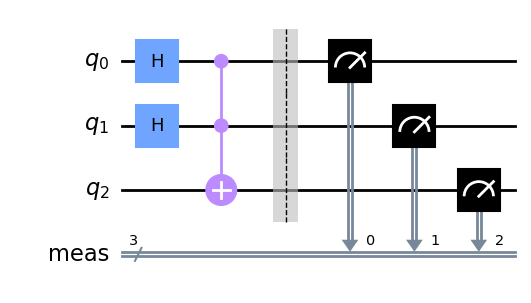

Selected backend:  ibmq_qasm_simulator
My job_id is: clqpcfcqoufpj6pr9ks0
Job Status: job has successfully run


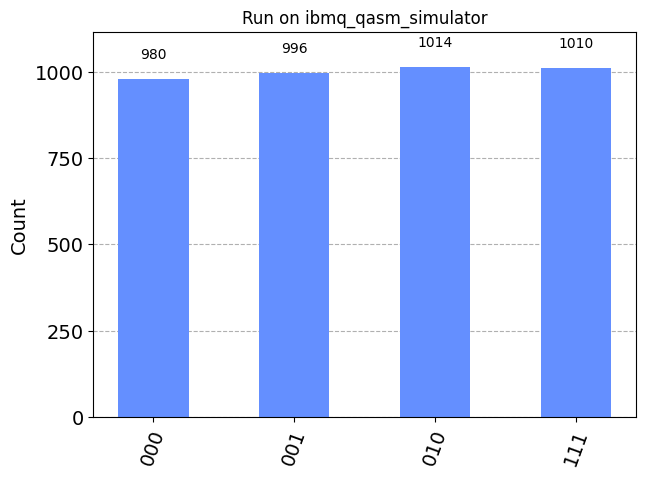

Selected backend:  ibm_kyoto
My job_id is: cntschtb08x0008y13sg
Job Status: job has successfully run                            


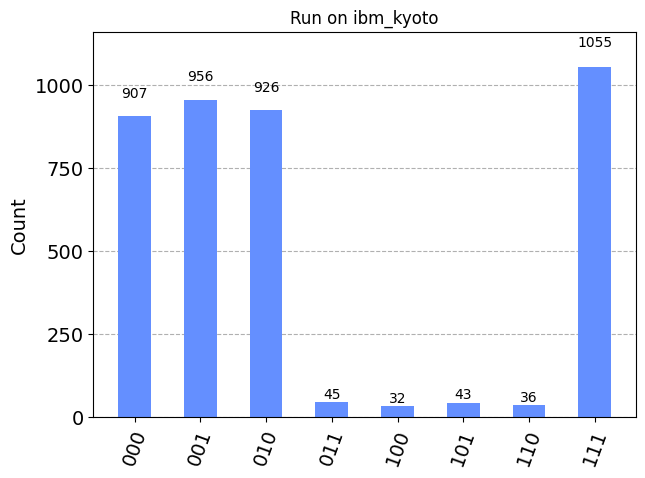

In [12]:
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit import transpile
from qiskit_ibm_provider.job import job_monitor
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h([0,1])
qc.ccx(0,1,2)
qc.measure_all()
display(qc.draw("mpl"))

provider = IBMProvider()

# Using simulator
backend = least_busy(provider.backends(min_num_qubits=3, simulator=True, operational=True))

print("Selected backend: ", backend.configuration().backend_name)

tqc = transpile(qc, backend)
ibm_job = backend.run(tqc)

print("My job_id is:", ibm_job.job_id())
job_monitor(ibm_job)

counts = ibm_job.result().get_counts()
display(plot_histogram(counts, title="Run on {0}".format(backend.configuration().backend_name)))

# Using real device
backend = least_busy(provider.backends(min_num_qubits=3, simulator=False, operational=True))

print("Selected backend: ", backend.configuration().backend_name)

tqc = transpile(qc, backend)
ibm_job = backend.run(tqc)

print("My job_id is:", ibm_job.job_id())
job_monitor(ibm_job)

counts = ibm_job.result().get_counts()
display(plot_histogram(counts, title="Run on {0}".format(backend.configuration().backend_name)))

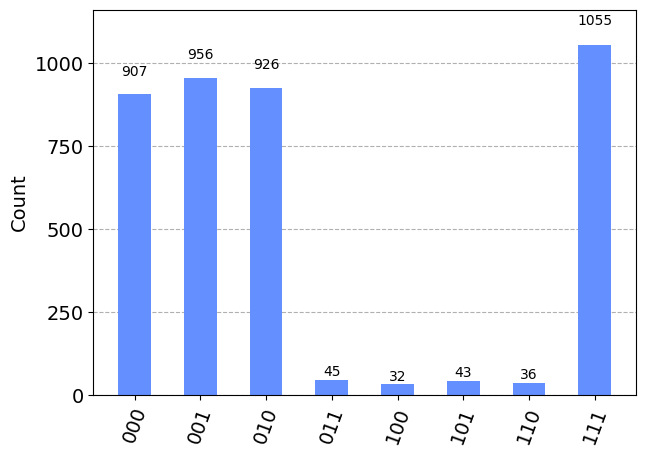

In [13]:
# In case it takes a big longer...
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram

# Retrieve last job from its id
retrieved_job = provider.retrieve_job("cntschtb08x0008y13sg") # Substitute with proper id
counts = retrieved_job.result().get_counts()
plot_histogram(counts)

We can observe that in the actual quantum computer values are added to the ones measured. This is completely understandable, due to the decoherence, which is related to the fact that quantum computers are not closed systems as they are considered by simulators. While in simulators no other state can be measured due to its 0 probability on the statevector, in actual quantum computers the theoretical statevector is substituted by the real statevector, which is affected by decoherence, resulting in non-zero probabilities of measuring non expected states. 

## 4.3. External providers

Besides IBM provider, there are also a number of 3rd party actors that offer cloud services that allow users to execute Qiskit-compatible quantum programs in different types of specialized hardware.

As an example the company Rigetti offers access to universal, gate-model machines based on tunable superconducting qubits. Others such as IonQ offer access to Ytterbium trapped-ion quantum computers with high gate fidelity, long coherence time and all-to-all connectivity.

In [ ]:
# Example Rigetti provider

# Intall the provider package
#pip install qiskit-ionq

from qiskit_ionq import IonQProvider

provider = IonQProvider("MY_IONQ_TOKEN")
backend = provider.get_backend("ionq_qpu")

# Build circuit
from qiskit import QuantumCircuit, transpile

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])

# Transpile circuit
transpiled_circuit = transpile(circuit, backend)

# Run the circuit and get result
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)


Qiskit has a <a href=https://qiskit.org/providers>dedicated website</a> that gathers some these providers. 

One can also implement its own provider by <a href=https://qiskit.org/documentation/apidoc/providers.html#writing-a-new-provider>extending the Qiskit Providers interface</a>.